### Setup

In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import time

In [2]:
subscription_key = "729a71455f084d5885fb65b14e25aa26"
search_url = "https://api.bing.microsoft.com/v7.0/images/search"
headers = {"Ocp-Apim-Subscription-Key" : subscription_key}

### Choosing the monuments

In [7]:
search_term = {"Eiffel": ["Eiffel tower", "torre eiffel", "la torre eiffel", "tour eiffel", "Eiffelturm", "Eiffel-torni", 
                          "Eiffeltårnet", "Eiffeltoren", "Wieża Eiffla", "Tháp Eiffel"],
    # 931 "Eiffel Thiet-thap",
               "Liberty": ["estátua da liberdade", "Statue of Liberty", "Statue de la Liberté", "Freiheitsstatue", 
                           "Estátua de la Libertad", "Vapaudenpatsas", "Statua Wolności","Vrijheidsbeeld", "Statua della Libertà"],
    # 827
               "Tower Bridge": ["Tower Bridge", "Puente de la Torre", "Ponte da Torre de Londres", "Ponte della Torre"],
    # 514
               "Basilica": ["St. Peter's Basilica", "Basílica de San Pedro", "Basilique Saint-Pierre", "Basílica de São Pedro",
                            "Basilica di San Pietro in Vaticano", "Petersdom"],
    # 569
               "BigBen": ['Big Ben', 'Clock Tower', 'Elizabeth Tower'],
    # 514
               "Wall": ["Great Wall of China", "Grande Muralha da China", "Gran Muralla China", "Grande Muraille",
                          "Kiinan muuri", "Chinesische Mauer", "Grande muraglia cinese", "Chinese Muur"],
    # 743
               "Notre-Dame": ["Notre-Dame Cathedral", "Notre-Dame de Paris", "Cattedrale di Notre-Dame", "Catedral de Notre Dame",
                       "Kathedrale Notre-Dame de Paris", "Notre-Damen katedraali"],
    # 473
               "Triomphe": ["Arc de Triomphe", "Arco de Triunfo de París", "Arco do Triunfo", "Riemukaari", 
                                   "Arc de Triomphe de l’Étoile"],
    # 440
               "Washington": ["Washington Monument", "Washington-monumentet", "Monumento a Washington", "Washington-monumentti",
                   "Pomnik Waszyngtona"],
    # 469
               "Pisa": ["Torre de Pisa", "Leaning Tower of Pisa", "Torre Pendente di Pisa", "Tower of Pisa", "Torre di Pisa",
                       "Torre de Pisa", "Schiefer Turm von Pisa", "Torre inclinada de Pisa", "Pisan torni",
                       "Krzywa Wieża w Pizie", "Tour de Pise", "Toren van Pisa"]
    # 514
    
              }

In [8]:
images = {"Eiffel": [],
          "Liberty": [],
          "Tower Bridge":[],
          "Basilica": [],
          "BigBen": [],
          "Wall": [],
          "Notre-Dame": [],
          "Triomphe": [],
          "Washington": [],
          "Pisa": []
        }

### Get the images

In [10]:
for i in search_term.keys():
    img = []
    for j in search_term[i]:
        time.sleep(2)
        print(j)
        thumbnail_urls = []
        offset = 0
        totalEstimatedMatches = 0
        while offset <= (totalEstimatedMatches + 1):
            params  = {"q": j, "license": "public", "imageType": "photo", "count": 150,
                      "offset":offset, "aspect": "tall"}
            response = requests.get(search_url, headers=headers, params=params)
            response.raise_for_status()
            search_results = response.json()
            totalEstimatedMatches = search_results["totalEstimatedMatches"]
            thumbnail_urls = thumbnail_urls + [image["thumbnailUrl"] for image in search_results["value"]]
            offset = offset + 150
        img = img + thumbnail_urls
    print(search_term[i])
    print(len(img))
    images[i] = list(dict.fromkeys(img))
    print(len(images[i]))

Eiffel tower
torre eiffel
la torre eiffel
tour eiffel
Eiffelturm
Eiffel-torni
Eiffeltårnet
Eiffeltoren
Wieża Eiffla
Tháp Eiffel
['Eiffel tower', 'torre eiffel', 'la torre eiffel', 'tour eiffel', 'Eiffelturm', 'Eiffel-torni', 'Eiffeltårnet', 'Eiffeltoren', 'Wieża Eiffla', 'Tháp Eiffel']
2227
965
estátua da liberdade
Statue of Liberty
Statue de la Liberté
Freiheitsstatue
Estátua de la Libertad
Vapaudenpatsas
Statua Wolności
Vrijheidsbeeld
Statua della Libertà
['estátua da liberdade', 'Statue of Liberty', 'Statue de la Liberté', 'Freiheitsstatue', 'Estátua de la Libertad', 'Vapaudenpatsas', 'Statua Wolności', 'Vrijheidsbeeld', 'Statua della Libertà']
1420
962
Tower Bridge
Puente de la Torre
Ponte da Torre de Londres
Ponte della Torre
['Tower Bridge', 'Puente de la Torre', 'Ponte da Torre de Londres', 'Ponte della Torre']
571
533
St. Peter's Basilica
Basílica de San Pedro
Basilique Saint-Pierre
Basílica de São Pedro
Basilica di San Pietro in Vaticano
Petersdom
["St. Peter's Basilica", 'Bas

### Resize the images and save them

Downsizing larger images to match the size of smaller images is often a better bet than increasing the size of small images to be larger.

In [11]:
width = []
height = []
for monument in images.keys():
    i = 0
    for img in images[monument]:
        try:
            image_data = requests.get(img)
            image_data.raise_for_status()
            width.append(Image.open(BytesIO(image_data.content)).size[0])
            height.append(Image.open(BytesIO(image_data.content)).size[1])
            i=i+1
        except:
            i=i+1

79 474 430.4093023255814 474.0
58 1408
6450
4763


(array([  16.,   41.,   47.,   21.,    6.,   44.,   89.,  247.,  234.,
          30.,   10.,   51.,   23.,  271.,   55.,   24.,  128.,  224.,
          63., 4826.]),
 array([ 79.  ,  98.75, 118.5 , 138.25, 158.  , 177.75, 197.5 , 217.25,
        237.  , 256.75, 276.5 , 296.25, 316.  , 335.75, 355.5 , 375.25,
        395.  , 414.75, 434.5 , 454.25, 474.  ]),
 <BarContainer object of 20 artists>)

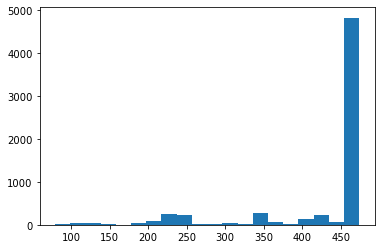

In [47]:
from statistics import mean, median
print(min(width),max(width),mean(width), median(width))
print(len(width))
print(width.count(474))

plt.hist(pd.DataFrame(width),bins=20)

58 1408 609.175968992248 632.0
6450
1344


(array([1.200e+01, 1.070e+02, 6.800e+01, 2.450e+02, 5.660e+02, 8.500e+01,
        2.460e+02, 1.540e+02, 2.343e+03, 2.303e+03, 1.330e+02, 1.540e+02,
        1.400e+01, 1.500e+01, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  58. ,  125.5,  193. ,  260.5,  328. ,  395.5,  463. ,  530.5,
         598. ,  665.5,  733. ,  800.5,  868. ,  935.5, 1003. , 1070.5,
        1138. , 1205.5, 1273. , 1340.5, 1408. ]),
 <BarContainer object of 20 artists>)

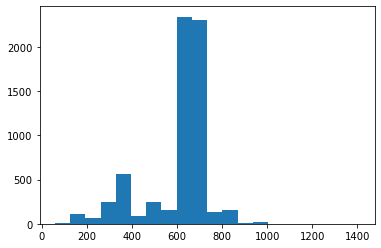

In [49]:
print(min(height),max(height),mean(height), median(height))
print(len(height))
print(height.count(632))

plt.hist(pd.DataFrame(height),bins=20)

In [55]:
images.keys()

dict_keys(['Eiffel', 'Liberty', 'Tower Bridge', 'Basilica', 'BigBen', 'Wall', 'Mont', 'Triomphe', 'Washington', 'Pisa'])

In [12]:
#to resize the image
for monument in images.keys():
#monument="Washington"
    i = 0 
    for img in images[monument]:
        try:
            image_data = requests.get(img)
            image_data.raise_for_status()  
            load_img_rz = np.array(Image.open(BytesIO(image_data.content)).resize((400,600)))
            Image.fromarray(load_img_rz).save(monument + str(i) + ".jpeg")
            i = i + 1
        except:
            i = i + 1

In [ ]:
# all the same shape
# > 1000 per category
# 10 categories
# download the images in different folders
# tutorial in tensorflow 2
# image preprocessing
# literature: image recognition and apply it to similar problem to ours
# diary of what I already did